In [2]:
#Importing libraries
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('student_success_analysis').getOrCreate()

In [3]:
#Reading and loading the first dataset
df1 = spark.read.load('student_data_second_part_tampered.csv', format = 'csv', header = 'true')

In [4]:
#Reading and loading the second dataset
df2 = spark.read.load('student_data_tampered.csv', format = 'csv', header = 'true')

In [5]:
#Data exploration
#Visualising the first data frame df1, in which we can see there are 17 columns
df1.show()

+---+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+----+----+---+
| ID|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences|  G1|  G2| G3|
+---+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+----+----+---+
|  1|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1|     3|       6|null|   6|  6|
|  2|  no|        no|     no|   yes|     yes|      no|     5|       3|    3|   1|   1|     3|       4|   5|   5|  6|
|  3| yes|        no|    yes|   yes|     yes|      no|     4|       3|    2|   2|   3|     3|      10|   7|   8| 10|
|  4| yes|       yes|    yes|   yes|     yes|     yes|     3|       2|    2|   1|   1|     5|       2|  15|  14| 15|
|  5| yes|        no|    yes|   yes|      no|      no|     4|       3|    2|   1|   2|     5|       4|   6|  10| 10|
|  6| yes|       yes|    yes|   yes|     yes|      no|     5|   

In [6]:
#Visualising the second data frame df2, in which we can see there are 18 columns
df2.show()


+---+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+
| ID|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|
+---+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+
|  1|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|no yes|
|  2|    GP|  F| 17|      U|    GT3|      T|   1|   1| at_home|   other|    course|  father|         1|        2|       0|       no|   yes|
|  3|    GP|  F| 15|      U|    LE3|      T|   1|   1| at_home|   other|     other|  mother|         1|        2|       3|      yes|    no|
|  4|    GP|  F| 15|      U|    GT3|      T|   4|   2|  health|services|      home|  mother|         1|        3|       0|       no|   yes|
|  5|    GP|  F| 16|

In [8]:
#Joining the two datasets into one dataset
master_data = df1.join(df2, "ID", how = 'left_outer')

In [9]:
#Visualising the data columns in the master dataset
master_data.columns

['ID',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup']

In [15]:
#Describing our data with some general statistics
master_data.describe().show()

+-------+------------------+----+----------+-------+------+--------+--------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------+----+------------------+-------+-------+-------+-----------------+------------------+-------+-------+----------+--------+------------------+------------------+------------------+---------+------+
|summary|                ID|paid|activities|nursery|higher|internet|romantic|            famrel|          freetime|             goout|              Dalc|              Walc|            health|         absences|                G1|                G2|                G3|school| sex|               age|address|famsize|Pstatus|             Medu|              Fedu|   Mjob|   Fjob|    reason|guardian|        traveltime|         studytime|          failures|schoolsup|famsup|
+-------+------------------+----+----------+-------+------+---

In [19]:
#Describing selected data with some general statistics
master_data.select("ID", "sex", "Mjob", "Medu", "Fjob", "Fedu", "G3" ).describe().show()

+-------+------------------+----+-------+-----------------+-------+------------------+------------------+
|summary|                ID| sex|   Mjob|             Medu|   Fjob|              Fedu|                G3|
+-------+------------------+----+-------+-----------------+-------+------------------+------------------+
|  count|               395| 395|    395|              395|    395|               395|               395|
|   mean|             198.0|null|   null|2.751898734177215|   null|2.5215189873417723|10.415189873417722|
| stddev|114.17092449481173|null|   null|1.096471123071355|   null|1.0882005458269433|4.5814426109978434|
|    min|                 1|   F|at_home|                0|at_home|                 0|                 0|
|    max|                99|   M|teacher|                4|teacher|                 4|                 9|
+-------+------------------+----+-------+-----------------+-------+------------------+------------------+



In [21]:
#Viewing data types
master_data.describe()

DataFrame[summary: string, ID: string, paid: string, activities: string, nursery: string, higher: string, internet: string, romantic: string, famrel: string, freetime: string, goout: string, Dalc: string, Walc: string, health: string, absences: string, G1: string, G2: string, G3: string, school: string, sex: string, age: string, address: string, famsize: string, Pstatus: string, Medu: string, Fedu: string, Mjob: string, Fjob: string, reason: string, guardian: string, traveltime: string, studytime: string, failures: string, schoolsup: string, famsup: string]

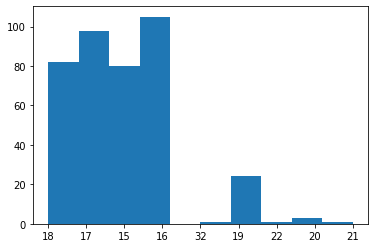

In [22]:
#Data visualisation 
#importing python libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#converting age into an array using Numpy and plotting it using pyplot
age_array = np.array(master_data.select('age').collect())
plt.hist(age_array)
plt.show()

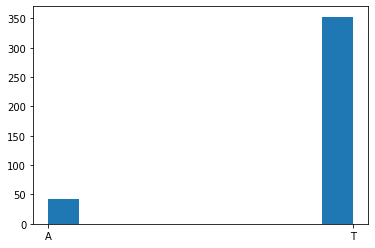

In [26]:
#converting sex into an array using Numpy and plotting it using pyplot
pstatus_array = np.array(master_data.select('Pstatus').collect())
plt.hist(pstatus_array)
plt.show()

In [11]:
#verifying data quality
#finding null values 

#from pyspark.sql.functions import col,isnan, when, count